# **Quantum Teleportation**


The codes an examples mentioned belows are taken from [**IBM Qiskit / Teleportation**](https://qiskit.org/textbook/ch-algorithms/teleportation.html#4.-Understanding-Quantum-Teleportation-) and the other refferences mention in **Reference Pages**. We can simulate quantum  teleportation using Qiskit, we will use Qiskits  simulator to test our circuit than run it on  real quantum computer. Our circuit will teleport the quantum state of a qubit to another qubit.



# What is Quantum Teleportation : 
We are all familiar with the word **"TELEPORTATION"** , litterally means transfer of any object physically  from one place to another . Well in Quantum Computing , this term has a specific meaning . Introduction: Quantum teleportation is the idea of transporting quantum information from one sender to another without sending the object itself. In 1993 an international group of six scientists, including IBM Fellow Charles H. Bennett, showed that perfect teleportation is indeed possible in principle, but only if the original is destroyed.In this paper, we are going to talk about how Quantum teleportation works, with some history (Physics) and a demonstration using IBM Qiskit as well as Quantum Computer. 

## History : 
To fully understand it we need to understand the following things :

a)	Quantum Entanglement: Entanglement is the phenomenon in which a system of two (or more) particles is generated such that the state of individual particles cannot be described independently. 


b)	EPR paradox : . In 1935 Albert Einstein published a paper with his 2 coworker Podolsky and Rosen  to prove that the Quantum Mechanic is an incomplete theory.The paper is  known as the EPR paradox . They argued that Quantum Mechanic is a local theory and thus its invalid.  They also came up with an idea of “Hidded Variable”


c)	Bells Theorem: In 1964, John Bell released a paper, “On the Einstein Podolsky Rosen Paradox.” Bell’s paper argues that the wave function is not incomplete as offered by EPR. He further claims that non-locality is not a problem for a theory that intends to reproduce quantum mechanical predictions.


To understand quantum teleportation, we need to go back to history a little when Quantum mechanics was just getting its wings at eary 20th century. In 1935 Albert Einstein published a paper with his 2 coworker Podolsky and Rosen  to prove that Quantum Mechanic is an incomplete theory, known as the EPR paradox . They argued that Quantum Mechanic is a local theory and thus its invalid. .They also came up with an idea of “Hidded Variable” . But later , after experiments when it is found that quantum mechanics violates Bell inequalities indicates that any hidden-variable theory underlying quantum mechanics must be non-local; whether this should be taken to imply that quantum mechanics itself is non-local is a matter of debate.However when the first test (after which numerous others followed) was performed in 1982 it fully agreed with the quantum mechanical predictions and it was shown that quantum mechanics was a non-local theory. With the acceptance of this idea, it is known why quantum teleportation works. 


# How Quantum Teleportation works :

Quantum Teleportation begins with the fact that Alice needs to transmit $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$ (a random qubit) to Bob. She doesn't know the state of the qubit. For this, Alice and Bob take the help of a third party (Telamon). Telamon prepares a pair of entangled qubits for Alice and Bob. The entangled qubits could be written in Dirac Notation as:

$$ |e \rangle = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle) $$

Alice and Bob each possess one qubit of the entangled pair (denoted as A and B respectively),

$$|e\rangle = \frac{1}{\sqrt{2}} (|0\rangle_A |0\rangle_B + |1\rangle_A |1\rangle_B) $$

This creates a three qubit quantum system where Alice has the first two qubits and Bob the last one.

$$ \begin{align*}
|\psi\rangle \otimes |e\rangle &= \frac{1}{\sqrt{2}} (\alpha |0\rangle \otimes (|00\rangle + |11\rangle) + \beta |1\rangle \otimes (|00\rangle + |11\rangle))\\
&= \frac{1}{\sqrt{2}} (\alpha|000\rangle + \alpha|011\rangle + \beta|100\rangle + \beta|111\rangle) 
\end{align*}$$

Now according to the protocol (We will talk about it later)  Alice applies CNOT gate on her two qubits followed by Hadamard gate on the first qubit. This results in the state:

$$ 
\begin{align*} (H \otimes I \otimes I) (CNOT \otimes I) (|\psi\rangle \otimes |e\rangle)
&=(H \otimes I \otimes I) (CNOT \otimes I) \frac{1}{\sqrt{2}} (\alpha|000\rangle + \alpha|011\rangle + \beta|100\rangle + \beta|111\rangle) \\
&= (H \otimes I \otimes I) \frac{1}{\sqrt{2}} (\alpha|000\rangle + \alpha|011\rangle + \beta|110\rangle + \beta|101\rangle) \\
&= \frac{1}{2}  (\alpha(|000\rangle + |011\rangle + |100\rangle + |111\rangle) + \beta(|010\rangle + |001\rangle - |110\rangle - |101\rangle)) \\
\end{align*}
$$

Which can then be separated and written as: 

$$
\begin{align*}
= \frac{1}{2}(
 & \phantom{+} |00\rangle (\alpha|0\rangle + \beta|1\rangle) \hphantom{\quad )} \\
 & + |01\rangle (\alpha|1\rangle + \beta|0\rangle) \hphantom{\quad )}\\[4pt]
 & + |10\rangle (\alpha|0\rangle - \beta|1\rangle) \hphantom{\quad )}\\[4pt]
 & + |11\rangle (\alpha|1\rangle - \beta|0\rangle) \quad )\\
\end{align*}
$$

Alice measures the first two qubit (which she owns) and sends them as two classical bits to Bob. The result she obtains is always one of the four standard basis states $|00\rangle, |01\rangle, |10\rangle,$ and $|11\rangle$ with equal probability.  

On the basis of her measurement, Bob's state will be projected to, 
$$ |00\rangle \rightarrow (\alpha|0\rangle + \beta|1\rangle)\\
|01\rangle \rightarrow (\alpha|1\rangle + \beta|0\rangle)\\
|10\rangle \rightarrow (\alpha|0\rangle - \beta|1\rangle)\\
|11\rangle \rightarrow (\alpha|1\rangle - \beta|0\rangle)$$.

Bob, on receiving the bits from Alice, knows he can obtain the original state $|\psi\rangle$ by applying appropriate transformations on his qubit that was once part of the entangled pair.

The transformations he needs to apply are:

$$
\begin{array}{c c c}
\mbox{Bob's State}                 & \mbox{Bits Received} & \mbox{Gate Applied} \\
(\alpha|0\rangle + \beta|1\rangle) & 00                   & I                   \\
(\alpha|1\rangle + \beta|0\rangle) & 01                   & X                   \\
(\alpha|0\rangle - \beta|1\rangle) & 10                   & Z                   \\
(\alpha|1\rangle - \beta|0\rangle) & 11                   & ZX
\end{array}
$$

After this step Bob will have successfully reconstructed Alice's state.

# Quantum Teleportation Protocol
To transfer a quantum bit, Alice and Bob must use a third party (Telamon) to send them an entangled qubit pair. Alice then performs some operations on her qubit, sends the results to Bob over a classical communication channel, and Bob then performs some operations on his end to receive Alice’s qubit.




We will describe the steps on a quantum circuit below. Here, no qubits are actually ‘sent’, But the quit information will be sent!


 # Part 1 : Setting up the Circuit 


## Imports and authentication :
We Begin with loading the **Qiskit Simulator(IBM)**  and provide authentication information as bellow :

The create the circuit , we also use  the additional and  necessary  imports  as follows (We are going to use both **qiskit and numpy** imports): 


In [333]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.visualization import array_to_latex
from qiskit.extensions import Initialize
from qiskit.ignis.verification import marginal_counts
from qiskit.quantum_info import random_statevector

Using  3 qubits and 2 classical bits in 2 different registers 

In [334]:
qr = QuantumRegister(3, name="q")
crz = ClassicalRegister(1, name="crz")
crx = ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

 To create a Bell pair between two qubits is to first transfer one of them to the X-basis (|+>⟩ and (|->) using a Hadamard gate, and then to apply a CNOT gate onto the other qubit controlled by the one in the X-basis.

In [335]:
def create_bell_pair(qc, a, b):
    """Creates a bell pair in qc using qubits a & b
------------------------------------------------
Input:(qc, qubit a, qubit b)
Output:
Apply Haddamard gate on qubit a.
Apply CNOT gate on  qubits a as controlled and b  as target.
This will create a bell state (entangled state)  of a and b.
------------------------------------------------------------
Example :create_bell_pair(qc, qo, q1)"""
    qc.h(a)
    qc.cx(a, b)

Using  3 qubits and 2 classical bits in 2 different registers

In [336]:
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

Entangles qubits q1 and q2 and  view the circuit so far:


In [337]:
create_bell_pair(teleportation_circuit, 1, 2)
teleportation_circuit.draw()

q_0: ──────────
       ┌───┐     
  q_1: ┤ H ├──■──
       └───┘┌─┴─┐
  q_2: ─────┤ X ├
            └───┘
crz: 1/══════════
                 
crx: 1/══════════

Lets assume that Alice has got q1 and Bob got q2 before the depart from each other.

Alice applies a CNOT gate to q1  controlled by |ψ⟩(the qubit she is trying to send Bob). Then Alice applies a Hadamard gate to |ψ⟩ .In our quantum circuit, the qubit |ψ⟩  Alice is trying to send is q0.

In [338]:
def alice_gates(qc, psi, a):
    """  Assigning qubits to Alice
    ----------------------------------
    Input:alice_gates(qc, psi, a)
    Output:
    Apply CNOT gate on psi as controlled and  a as target
    apply haddamard gate on psi.
    Example : alice_gates(qc, q0, q1)
    -----------------------------------
    Alice performs her magic tricks on her assigned qubits."""
    qc.cx(psi, a)
    qc.h(psi)

Using 3 qubits and 2 classical bits in 2 different registers:

In [339]:
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

Step 1: Creating Bell pairs:

In [340]:
create_bell_pair(teleportation_circuit, 1, 2)

Step 2 : Use barrier to separate steps, it will make it easier to understand the circuit.
Visualize the progress . 

In [341]:
teleportation_circuit.barrier()
alice_gates(teleportation_circuit, 0, 1)
teleportation_circuit.draw()

░      ┌───┐
  q_0: ───────────░───■──┤ H ├
       ┌───┐      ░ ┌─┴─┐└───┘
  q_1: ┤ H ├──■───░─┤ X ├─────
       └───┘┌─┴─┐ ░ └───┘     
  q_2: ─────┤ X ├─░───────────
            └───┘ ░           
crz: 1/═══════════════════════
                              
crx: 1/═══════════════════════

Step 3 Alice applies a measurement to both qubits q1 and  |ψ⟩ that she owns and d stores this result in two classical bits. She then sends these two bits to Bob.

In [342]:
def measure_and_send(qc, a, b):
    """ Measures qubits a & b and 'sends' the results to Bob
    -------------------------------------------------------
    Input:measure_and_send(qc, a, b)
    Output:
    A new barrier will be created to seperate the taks.
    Circuit will measure the value for qubit a and assign it to
    classical bit  0
    Circuit will measure the value for qubit b and assign it to
    classical bit  1
    ---------------------------------------------------------------------------
    Example: measure_and_send(qc, q0, q1)"""
    qc.barrier()
    qc.measure(a, 0)
    qc.measure(b, 1)

 Use barrier to separate steps.Measure and draw the circuit.

In [343]:
measure_and_send(teleportation_circuit, 0, 1)
teleportation_circuit.draw()

░      ┌───┐ ░ ┌─┐   
  q_0: ───────────░───■──┤ H ├─░─┤M├───
       ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
  q_1: ┤ H ├──■───░─┤ X ├──────░──╫─┤M├
       └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘
  q_2: ─────┤ X ├─░────────────░──╫──╫─
            └───┘ ░            ░  ║  ║ 
crz: 1/═══════════════════════════╩══╬═
                                  0  ║ 
                                     ║ 
crx: 1/══════════════════════════════╩═
                                     0

Bob, who already has the qubit q2, then applies the following gates depending on the state of the classical bits: \
00  →  Do nothing .\
01  →  Apply X gate.\
10  →  Apply Z  gate\
11  →  Apply ZX gate.\
This function takes a QuantumCircuit (qc), integer (qubit) and ClassicalRegisters (crz & crx) to decide which gates to apply

Here we use c_if to control our gates with a classical bit instead of a qubit. 
Apply gates if the registers are in state 1.


In [344]:
def bob_gates(qc, qubit, crz, crx):
    """This function takes a QuantumCircuit (qc), integer (qubit)
    and ClassicalRegisters (crz & crx) to decide which gates to apply.
    Here we use c_if to control our gates with a classical bit instead
    of a qubit
    -----------------------------------------------------------
    Input : bob_gates(qc, qubit, crz, crx)
        Output: Here we use c_if to control our gates with a classical bit
        instead of a qubit
        Apply gates if the registers are in the state '1
                Example : bob_gates(qc, q0, crz, crx).
        ------------------------------------------------------------
    Bob  performs her magic tricks on his assigned qubits."""
    qc.x(qubit).c_if(crx, 1)
    qc.z(qubit).c_if(crz, 1)

Using  3 qubits and 2 classical bits in 2 different registers


In [345]:
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

STEP 1, create bell pair 


In [346]:
create_bell_pair(teleportation_circuit, 1, 2)

Step 2:  Use barrier to separate steps


In [347]:
teleportation_circuit.barrier()
alice_gates(teleportation_circuit, 0, 1)

STEP 3 : Measurement and send 

In [348]:
measure_and_send(teleportation_circuit, 0, 1)

STEP 4 : Use barrier to separate steps


In [349]:
teleportation_circuit.barrier()
bob_gates(teleportation_circuit, 2, crz, crx)
teleportation_circuit.draw()

░      ┌───┐ ░ ┌─┐    ░               
  q_0: ───────────░───■──┤ H ├─░─┤M├────░───────────────
       ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░               
  q_1: ┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░───────────────
       └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░  ┌───┐  ┌───┐ 
  q_2: ─────┤ X ├─░────────────░──╫──╫──░──┤ X ├──┤ Z ├─
            └───┘ ░            ░  ║  ║  ░  └─╥─┘  └─╥─┘ 
                                  ║  ║       ║   ┌──╨──┐
crz: 1/═══════════════════════════╩══╬═══════╬═══╡ = 1 ╞
                                  0  ║    ┌──╨──┐└─────┘
crx: 1/══════════════════════════════╩════╡ = 1 ╞═══════
                                     0    └─────┘

At the end of this protocole Alices Qubit (q0) has been Teleported to Bob (q2)  successfully. 

# Part 2  : Testing the Protocol in Qiskit simulator 


In this notebook, we will initialize Alice's qubit in a random state $ \vert\psi\rangle $ (`psi`). This state will be created using an `Initialize` gate on $|q_0\rangle$. In this chapter we use the function `random_statevector` to choose `psi` for us, but feel free to set `psi` to any qubit state you want.

Now , We will create a random 1-qubit state and plot it on a block sphere 

<IPython.core.display.Latex object>

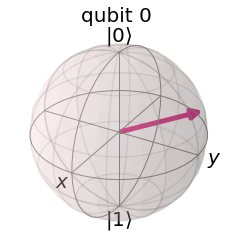

In [350]:
psi = random_statevector(2)
display(array_to_latex(psi, prefix="|\\psi\\rangle ="))
plot_bloch_multivector(psi)

Let's create our initialization instruction to create $|\psi\rangle$ from the state $|0\rangle$:

In [351]:
init_gate = Initialize(psi)
init_gate.label = "init"

(`Initialize` is technically not a gate since it contains a reset operation, and so is not reversible. We call it an 'instruction' instead). If the quantum teleportation circuit works, then at the end of the circuit the qubit $|q_2\rangle$ will be in this state. We will check this using the statevector simulator.

 Using the Simulated Statevector We can use the Aer simulator to verify our qubit has been teleported.

Following Protocol using 3 qubits and  and 2 classical registers

In [352]:
qr = QuantumRegister(3, name="q")
crz = ClassicalRegister(1, name="crz")
crx = ClassicalRegister(1, name="crx")
qc = QuantumCircuit(qr, crz, crx)

First, let's initialize Alice's q0


In [353]:
qc.append(init_gate, [0])
qc.barrier()

Now  we can begins the teleportation protocol



In [354]:
create_bell_pair(qc, 1, 2)
qc.barrier()

Lets  Send q1 to Alice and q2 to Bob

In [355]:
alice_gates(qc, 0, 1)

Alice then sends her classical bits to Bob



In [356]:
measure_and_send(qc, 0, 1)

Bob now decodes hisqubits

In [357]:
bob_gates(qc, 2, crz, crx)

Lets Display the circuit


In [358]:
qc.draw()

┌───────────────────────────────────────────┐ ░            ░      ┌───┐»
  q_0: ┤ init(-0.0034568-0.7843j,0.50746+0.35686j) ├─░────────────░───■──┤ H ├»
       └───────────────────────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘»
  q_1: ──────────────────────────────────────────────░─┤ H ├──■───░─┤ X ├─────»
                                                     ░ └───┘┌─┴─┐ ░ └───┘     »
  q_2: ──────────────────────────────────────────────░──────┤ X ├─░───────────»
                                                     ░      └───┘ ░           »
crz: 1/═══════════════════════════════════════════════════════════════════════»
                                                                              »
crx: 1/═══════════════════════════════════════════════════════════════════════»
                                                                              »
«        ░ ┌─┐                 
«  q_0: ─░─┤M├─────────────────
«        ░ └╥┘┌─┐              
«  q_1: ─░──╫─┤M├──────────────
«        ░  ║ └╥┘ ┌───┐  ┌───┐ 
«  q_2: ─░──╫──╫──┤ X ├──┤ Z ├─
«        ░  ║  ║  └─╥─┘  └─╥─┘ 
«           ║  ║    ║   ┌──╨──┐
«crz: 1/════╩══╬════╬═══╡ = 1 ╞
«           0  ║ ┌──╨──┐└─────┘
«crx: 1/═══════╩═╡ = 1 ╞═══════
«              0 └─────┘

We can see below, using the statevector obtained from the aer simulator, that the state of $|q_2\rangle$ is the same as the state $|\psi\rangle$ we created above, while the states of $|q_0\rangle$ and $|q_1\rangle$ have been collapsed to either $|0\rangle$ or $|1\rangle$. The state $|\psi\rangle$ has been teleported from qubit 0 to qubit 2.

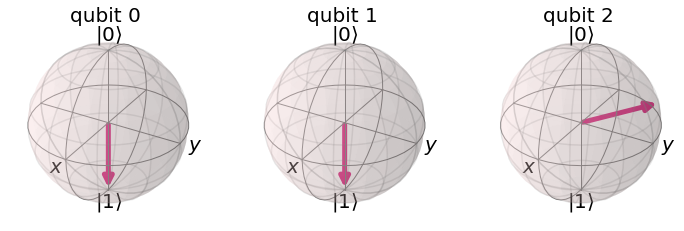

In [359]:
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
out_vector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(out_vector)

You can run this cell a few times to make sure. You may notice that the qubits 0 & 1 change states, but qubit 2 is always in the state $|\psi\rangle$.

# Part 3:  Test the protocol
On a real quantum computer, we would not be able to sample the statevector, so if we wanted to check our teleportation circuit is working, we need to do things slightly differently. The `Initialize` instruction first performs a reset, setting our qubit to the state $|0\rangle$. It then applies gates to turn our $|0\rangle$ qubit into the state $|\psi\rangle$:

$$ |0\rangle \xrightarrow{\text{Initialize gates}} |\psi\rangle $$

Since all quantum gates are **reversible**, we can find the inverse of these gates using:

In [360]:
inverse_init_gate = init_gate.gates_to_uncompute()

This operation has the property:

$$ |\psi\rangle \xrightarrow{\text{Inverse Initialize gates}} |0\rangle $$

To prove the qubit $|q_0\rangle$ has been teleported to $|q_2\rangle$, if we do this inverse initialization on $|q_2\rangle$, we expect to measure $|0\rangle$ with certainty. We do this in the circuit below:

Protocol uses 3 qubits , and 2 classical registers (renaming crz and crx):

In [361]:
qr = QuantumRegister(3, name="q")
crz = ClassicalRegister(1, name="crz")
crx = ClassicalRegister(1, name="crx")
qc = QuantumCircuit(qr, crz, crx)

First, let's initialize Alice's q0


In [362]:
qc.append(init_gate, [0])
qc.barrier()

Now begins the teleportation protocol, Create the **Bell Pair**, Send q1 to Alice and q2 to Bob .

In [363]:
create_bell_pair(qc, 1, 2)
qc.barrier()
alice_gates(qc, 0, 1)

Alice mesures her qubits and then sends her classical bits to Bob

In [364]:
measure_and_send(qc, 0, 1)

Now Bob decodes qubits, following the protocol. 


In [365]:
bob_gates(qc, 2, crz, crx)

Lets reverse the initialization process
and  Display the circuit

In [366]:
qc.append(inverse_init_gate, [2])
qc.draw()

┌───────────────────────────────────────────┐ ░            ░      ┌───┐»
  q_0: ┤ init(-0.0034568-0.7843j,0.50746+0.35686j) ├─░────────────░───■──┤ H ├»
       └───────────────────────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘»
  q_1: ──────────────────────────────────────────────░─┤ H ├──■───░─┤ X ├─────»
                                                     ░ └───┘┌─┴─┐ ░ └───┘     »
  q_2: ──────────────────────────────────────────────░──────┤ X ├─░───────────»
                                                     ░      └───┘ ░           »
crz: 1/═══════════════════════════════════════════════════════════════════════»
                                                                              »
crx: 1/═══════════════════════════════════════════════════════════════════════»
                                                                              »
«        ░ ┌─┐                                 
«  q_0: ─░─┤M├─────────────────────────────────
«        ░ └╥┘┌─┐                              
«  q_1: ─░──╫─┤M├──────────────────────────────
«        ░  ║ └╥┘ ┌───┐  ┌───┐ ┌──────────────┐
«  q_2: ─░──╫──╫──┤ X ├──┤ Z ├─┤ disentangler ├
«        ░  ║  ║  └─╥─┘  └─╥─┘ └──────────────┘
«           ║  ║    ║   ┌──╨──┐                
«crz: 1/════╩══╬════╬═══╡ = 1 ╞════════════════
«           0  ║ ┌──╨──┐└─────┘                
«crx: 1/═══════╩═╡ = 1 ╞═══════════════════════
«              0 └─────┘

We can see the `inverse_init_gate` appearing, labelled **'disentangler'** on the circuit diagram. Finally, we measure the third qubit and store the result in the third classical bit(we Need to add a new Classical Register to see the result):

In [367]:
cr_result = ClassicalRegister(1)
qc.add_register(cr_result)
qc.measure(2, 2)
qc.draw()

┌───────────────────────────────────────────┐ ░            ░      ┌───┐»
  q_0: ┤ init(-0.0034568-0.7843j,0.50746+0.35686j) ├─░────────────░───■──┤ H ├»
       └───────────────────────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘»
  q_1: ──────────────────────────────────────────────░─┤ H ├──■───░─┤ X ├─────»
                                                     ░ └───┘┌─┴─┐ ░ └───┘     »
  q_2: ──────────────────────────────────────────────░──────┤ X ├─░───────────»
                                                     ░      └───┘ ░           »
crz: 1/═══════════════════════════════════════════════════════════════════════»
                                                                              »
crx: 1/═══════════════════════════════════════════════════════════════════════»
                                                                              »
 c8: 1/═══════════════════════════════════════════════════════════════════════»
                                                                              »
«        ░ ┌─┐                                    
«  q_0: ─░─┤M├────────────────────────────────────
«        ░ └╥┘┌─┐                                 
«  q_1: ─░──╫─┤M├─────────────────────────────────
«        ░  ║ └╥┘ ┌───┐  ┌───┐ ┌──────────────┐┌─┐
«  q_2: ─░──╫──╫──┤ X ├──┤ Z ├─┤ disentangler ├┤M├
«        ░  ║  ║  └─╥─┘  └─╥─┘ └──────────────┘└╥┘
«           ║  ║    ║   ┌──╨──┐                 ║ 
«crz: 1/════╩══╬════╬═══╡ = 1 ╞═════════════════╬═
«           0  ║ ┌──╨──┐└─────┘                 ║ 
«crx: 1/═══════╩═╡ = 1 ╞════════════════════════╬═
«              0 └─────┘                        ║ 
« c8: 1/════════════════════════════════════════╩═
«                                               0

Lets  we run our experiment and plot the histogram result:

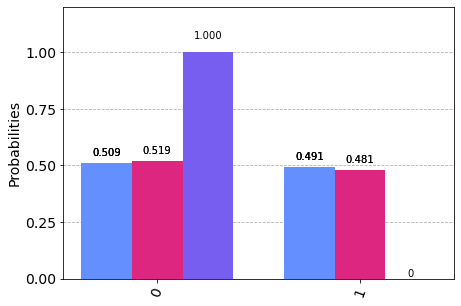

In [368]:
t_qc = transpile(qc, sim)
t_qc.save_statevector()
counts = sim.run(t_qc).result().get_counts()
qubit_counts = [marginal_counts(counts, [qubit]) for qubit in range(3)]
plot_histogram(qubit_counts)

We can see we have a **100%** chance of measuring $q_2$ (the purple bar in the histogram) in the state $|0\rangle$. This is the expected result, and indicates that the teleportation protocol has worked **properly**.

# Part 4: Execute the simulation on a real Quantum Computer

Let us re-write the bob_gates function to new_bob_gates:


In [369]:
def new_bob_gates(qc, a, b, c):
    """" Defining new gate
    ------------------------------------
    Input:new_bob_gates(qc, a, b, c)
    Output:Circuit will perform a CNOT gate on controlled b and target c.
    Circuit will perform a Controlled Z on a(controlled) and c(target)
    -----------------------------------------------------------------
    Example : new_bob_gates(qc, q0, q1, q2)"""
    qc.cx(b, c)
    qc.cz(a, c)

And create our new circuit:

In [370]:
qc = QuantumCircuit(3, 1)

First, let's initialize Alice's q0:



In [371]:
qc.append(init_gate, [0])
qc.barrier()

 Now begins the teleportation protocol:

In [372]:
create_bell_pair(qc, 1, 2)
qc.barrier()

Send q1 to Alice and q2 to Bob

In [373]:
alice_gates(qc, 0, 1)
qc.barrier()

Alice sends classical bits to Bob

In [374]:
new_bob_gates(qc, 0, 1, 2)

We undo the initialization process

In [375]:
qc.append(inverse_init_gate, [2])

As we only care about the state of qubit 2, lets measure and see the results:

In [378]:
qc.measure(2, 0)
qc.draw()

┌───────────────────────────────────────────┐ ░            ░      ┌───┐ ░ »
q_0: ┤ init(-0.0034568-0.7843j,0.50746+0.35686j) ├─░────────────░───■──┤ H ├─░─»
     └───────────────────────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ »
q_1: ──────────────────────────────────────────────░─┤ H ├──■───░─┤ X ├──────░─»
                                                   ░ └───┘┌─┴─┐ ░ └───┘      ░ »
q_2: ──────────────────────────────────────────────░──────┤ X ├─░────────────░─»
                                                   ░      └───┘ ░            ░ »
c: 1/══════════════════════════════════════════════════════════════════════════»
                                                                               »
«                                   
«q_0: ──────■───────────────────────
«           │                       
«q_1: ──■───┼───────────────────────
«     ┌─┴─┐ │ ┌──────────────┐┌─┐┌─┐
«q_2: ┤ X ├─■─┤ disentangler ├┤M├┤M├
«     └───┘   └──────────────┘└╥┘└╥┘
«c: 1/═════════════════════════╩══╩═
«                              0  0

We have to see what devices we are **allowed** to use by loading our saved accounts.We can get the least-busy backend at IBM and run the quantum circuit there.

In [379]:
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and
                                   not b.configuration().simulator and b.status().operational==True))
t_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(t_qc)
job_monitor(job)  # this will displays job status under cell

3:80: E501 line too long (92 > 79 characters)
4:36: E128 continuation line under-indented for visual indent
4:80: E501 line too long (101 > 79 characters)
4:94: E225 missing whitespace around operator


ValueError: too many values to unpack (expected 3)

Lets get the results and display them using histogrm plot:

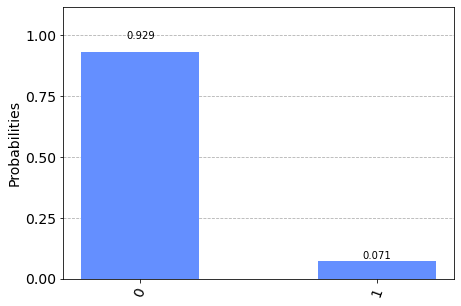

In [380]:
exp_result = job.result()
exp_counts = exp_result.get_counts(qc)
print(exp_counts)
plot_histogram(exp_counts)

As we see here, there are a few results in which we measured $|1\rangle$. These arise due to errors in the gates and the qubits. In contrast, our simulator in the earlier part of the notebook had zero errors in its gates, and allowed error-free teleportation.

In [382]:
print(f"The experimental error rate:{exp_counts['1']*100/sum(exp_counts.values()):.3f}%")

1:80: E501 line too long (89 > 79 characters)


We are seeing a little error because this is real result from real calculation in **Quantum Computer**

# References 
1) IBM. “Quantum Teleportation.” Qiskit.Org, 18 Oct. 2021, qiskit.org/textbook/ch-algorithms/teleportation.html.

2) M. Nielsen and I. Chuang, Quantum Computation and Quantum Information, Cambridge Series on Information and the Natural Sciences (Cambridge University Press, Cambridge, 2000).

3) Eleanor Rieffel and Wolfgang Polak, Quantum Computing: a Gentle Introduction (The MIT Press Cambridge England, Massachusetts, 2011).
